In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the datasets using the paths provided
drug_deaths = pd.read_csv('/Users/arka_bagchi/Desktop/Springboard/Data Storytelling/drug_deaths_storytelling.csv')
drug_deaths.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [3]:
# Dropping the redundant column
drug_deaths.drop(columns=['Unnamed: 0'], inplace=True)

# Checking for missing values
missing_values = drug_deaths.isnull().sum()

# Getting a summary of the data
data_summary = drug_deaths.describe(include='all')

missing_values, data_summary

(ID                        0
 Date                      2
 DateType                  2
 Age                       3
 Sex                       6
 Race                     13
 ResidenceCity           173
 ResidenceCounty         797
 ResidenceState         1549
 DeathCity                 5
 DeathCounty            1100
 Location                 24
 LocationifOther        4515
 DescriptionofInjury     780
 InjuryPlace              66
 InjuryCity             1756
 InjuryCounty           2741
 InjuryState            3681
 COD                       0
 OtherSignifican        4936
 Heroin                    0
 Cocaine                   0
 Fentanyl                  0
 Fentanyl_Analogue         0
 Oxycodone                 0
 Oxymorphone               0
 Ethanol                   0
 Hydrocodone               0
 Benzodiazepine            0
 Methadone                 0
 Amphet                    0
 Tramad                    0
 Morphine_NotHeroin        0
 Hydromorphone             0
 Other        

In [4]:
# Handling missing values for the demographic information
drug_deaths['Age'].fillna(drug_deaths['Age'].median(), inplace=True)  # Filling age with median
drug_deaths['Sex'].fillna('Unknown', inplace=True)  # Filling sex with 'Unknown'
drug_deaths['Race'].fillna('Unknown', inplace=True)  # Filling race with 'Unknown'

# Handling missing values for location-based data
location_cols = ['ResidenceCity', 'ResidenceCounty', 'ResidenceState', 
                 'InjuryCity', 'InjuryCounty', 'InjuryState']

for col in location_cols:
    drug_deaths[col].fillna('Unknown', inplace=True)

# Handling missing values for other categorical data
drug_deaths['MannerofDeath'].fillna('Unknown', inplace=True)
drug_deaths['DescriptionofInjury'].fillna('Unknown', inplace=True)
drug_deaths['OtherSignifican'].fillna('Unknown', inplace=True)

# Verifying the missing values after the imputations
missing_values_after = drug_deaths.isnull().sum()
missing_values_after

ID                        0
Date                      2
DateType                  2
Age                       0
Sex                       0
Race                      0
ResidenceCity             0
ResidenceCounty           0
ResidenceState            0
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury       0
InjuryPlace              66
InjuryCity                0
InjuryCounty              0
InjuryState               0
COD                       0
OtherSignifican           0
Heroin                    0
Cocaine                   0
Fentanyl                  0
Fentanyl_Analogue         0
Oxycodone                 0
Oxymorphone               0
Ethanol                   0
Hydrocodone               0
Benzodiazepine            0
Methadone                 0
Amphet                    0
Tramad                    0
Morphine_NotHeroin        0
Hydromorphone             0
Other                  4670
OpiateNOS           

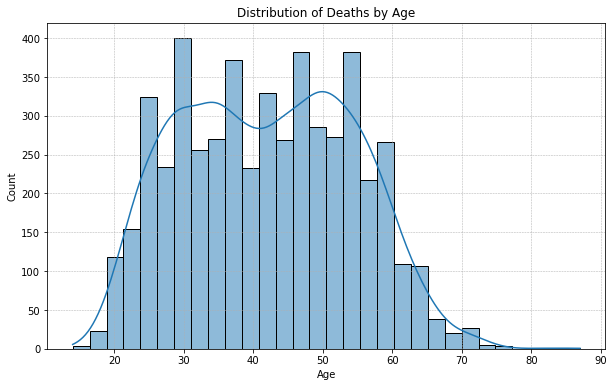

In [5]:
# Distribution of deaths by Age
plt.figure(figsize=(10, 6))
sns.histplot(drug_deaths['Age'], bins=30, kde=True)
plt.title('Distribution of Deaths by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


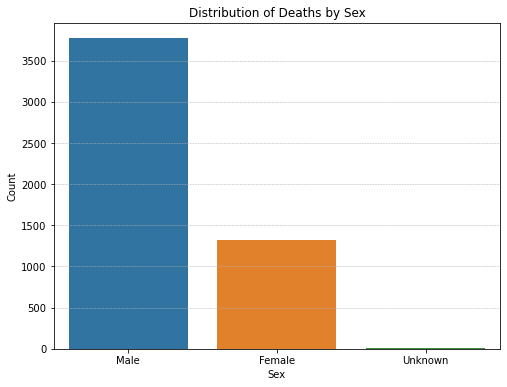

In [6]:
# Distribution of deaths by Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=drug_deaths, x='Sex', order=drug_deaths['Sex'].value_counts().index)
plt.title('Distribution of Deaths by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


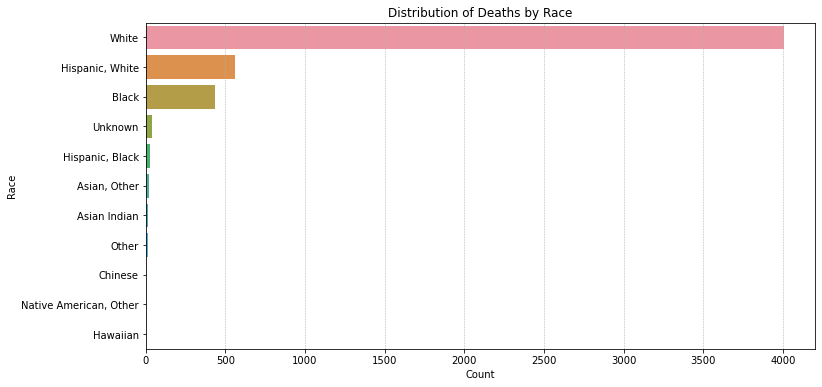

In [7]:
# Distribution of deaths by Race
plt.figure(figsize=(12, 6))
sns.countplot(data=drug_deaths, y='Race', order=drug_deaths['Race'].value_counts().index)
plt.title('Distribution of Deaths by Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()


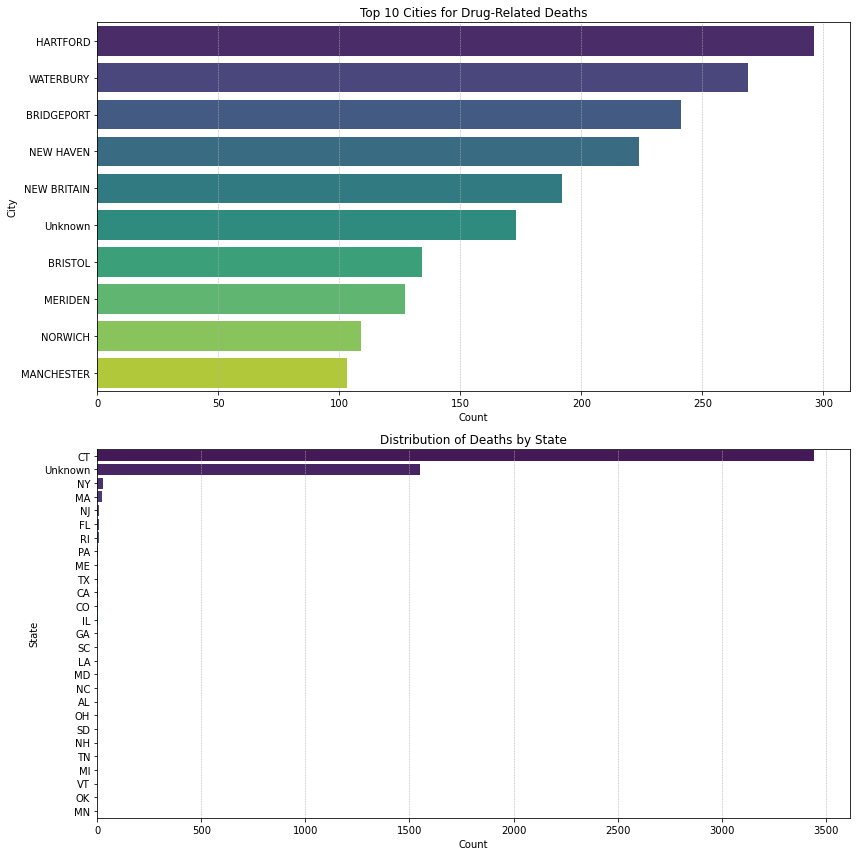

In [8]:
# Top 10 cities for drug-related deaths
top_cities = drug_deaths['ResidenceCity'].value_counts().head(10)

# Top states for drug-related deaths
top_states = drug_deaths['ResidenceState'].value_counts()

# Plotting the distributions
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Top Cities
sns.barplot(x=top_cities.values, y=top_cities.index, ax=ax[0], palette="viridis")
ax[0].set_title('Top 10 Cities for Drug-Related Deaths')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('City')
ax[0].grid(axis='x', linestyle='--', linewidth=0.5)

# Top States
sns.barplot(x=top_states.values, y=top_states.index, ax=ax[1], palette="viridis")
ax[1].set_title('Distribution of Deaths by State')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('State')
ax[1].grid(axis='x', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [10]:
# Columns indicating the presence of specific drugs
drug_columns = ['Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone', 'Benzodiazepine', 
                'Ethanol', 'Methadone', 'Amphet', 'Tramad', 'AnyOpioid']

# Calculating the prevalence for each drug
drug_counts = drug_deaths[drug_columns].sum()

# Plotting the prevalence of the drugs
plt.figure(figsize=(12, 8))
sns.barplot(x=drug_counts.values, y=drug_counts.index, palette="magma")
plt.title('Prevalence of Drugs Detected in Deaths')
plt.xlabel('Count')
plt.ylabel('Drug')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()


TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 864x576 with 0 Axes>

In [11]:
# Checking the data types of the drug columns
drug_data_types = drug_deaths[drug_columns].dtypes

# Converting the columns to numeric data type if they aren't already
for col in drug_columns:
    drug_deaths[col] = pd.to_numeric(drug_deaths[col], errors='coerce')

# Verifying the conversions
converted_data_types = drug_deaths[drug_columns].dtypes

drug_data_types, converted_data_types

(Heroin             int64
 Cocaine            int64
 Fentanyl          object
 Oxycodone          int64
 Benzodiazepine     int64
 Ethanol            int64
 Methadone          int64
 Amphet             int64
 Tramad             int64
 AnyOpioid         object
 dtype: object,
 Heroin              int64
 Cocaine             int64
 Fentanyl          float64
 Oxycodone           int64
 Benzodiazepine      int64
 Ethanol             int64
 Methadone           int64
 Amphet              int64
 Tramad              int64
 AnyOpioid         float64
 dtype: object)

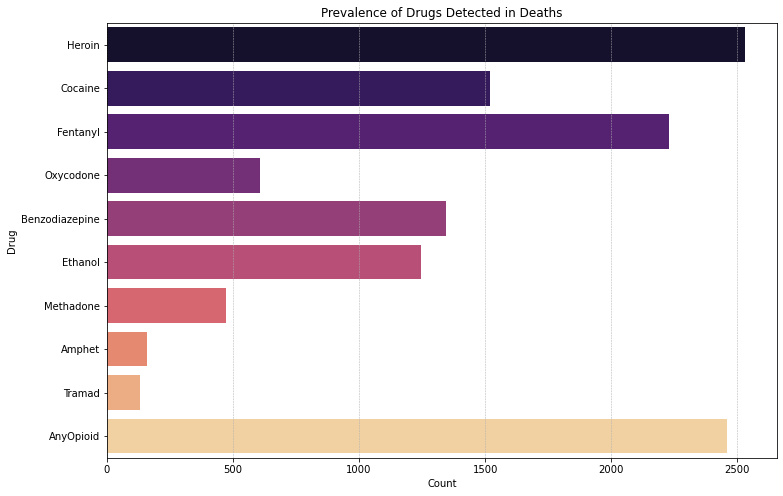

In [12]:
# Calculating the prevalence for each drug again
drug_counts = drug_deaths[drug_columns].sum()

# Plotting the prevalence of the drugs
plt.figure(figsize=(12, 8))
sns.barplot(x=drug_counts.values, y=drug_counts.index, palette="magma")
plt.title('Prevalence of Drugs Detected in Deaths')
plt.xlabel('Count')
plt.ylabel('Drug')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()

In [13]:
# Saving the cleaned dataset to a new CSV file on my local system
cleaned_csv_path = '/Users/arka_bagchi/Desktop/Springboard/Data Storytelling/drug_deaths_cleaned.csv'
drug_deaths.to_csv(cleaned_csv_path, index=False)